<a href="https://colab.research.google.com/github/Kaushal-DCU-2023-25/CA683I_DA_AM_Assignment/blob/main/Kaushal_Module_1_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Analysis is the process of constructing a mathematical model or function that can be used to predict one variable using another variable (simple linear regression) or variables (multiple linear regression). The basic idea is to create a line of best fit in the data.

By linear we are really saying we have a function such as:

>$y_{i}=a+bx_{i} + e_{i}$ $ where $ $i=1 $ $to$  $n$

>$y_{i}$ is known as the dependent variable and is generally the variable we are trying to predict and $i$ is the row number in the dataset.

>$x_{i}$ is the independent variable and is the one we are using as a predictor variable.

>$a$ is the intercept and is the expected mean when $x_{i}$ is zero.
>$b$ is the slope or the rate of change in $y$ for for a unit increase in $x$.

>$e_{i}$ is **independently normally distributed with a mean of 0 and a constant variance**.

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [22]:
import pandas as pd
#import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

   Month  No. of Adverts (X)  No. of bookings (Y)
0    1.0                20.0                 61.0
1    2.0                24.0                 77.0
2    3.0                30.0                 72.0
3    4.0                23.0                 66.0
4    5.0                27.0                 85.0
5    6.0                25.0                 77.0
6    7.0                32.0                 90.0
7    8.0                35.0                100.0


<Axes: xlabel='No. of Adverts (X)', ylabel='No. of bookings (Y)'>

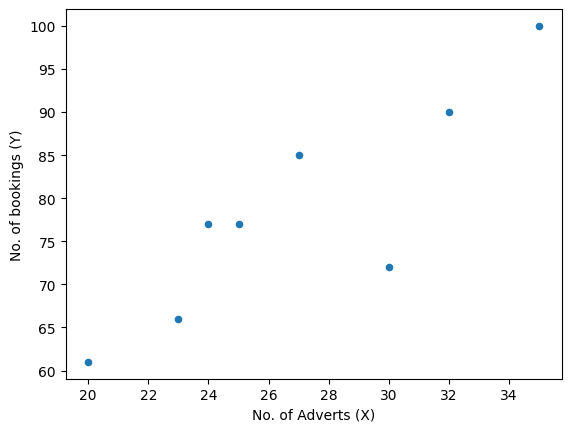

In [18]:
downloaded = drive.CreateFile({'id':'1c6a_pYDJP1KZz6pdTQp_s_cFsBt3oexH'})
downloaded.GetContentFile('Adcampaign.csv')
df3 = pd.read_csv('Adcampaign.csv')

df3 = df3.filter(['Month','No. of Adverts (X)', 'No. of bookings (Y)'])
df3 = df3.dropna()
print(df3)

df3.plot.scatter(x='No. of Adverts (X)', y= 'No. of bookings (Y)')

<Axes: xlabel='No. of Adverts (X)', ylabel='No. of bookings (Y)'>

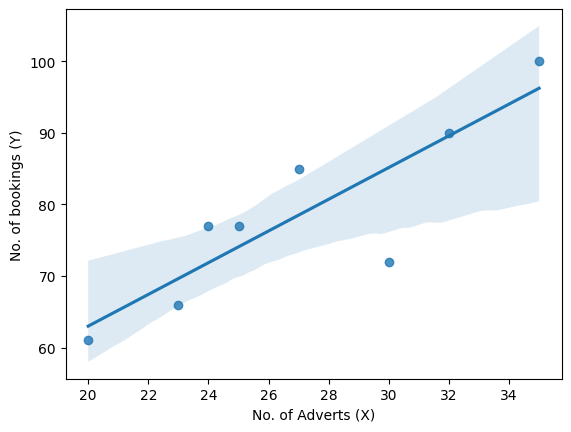

In [20]:
import seaborn as sns

sns.regplot(x='No. of Adverts (X)', y= 'No. of bookings (Y)', data=df3)

coefficient of determination: 0.7541051880057117
intercept: [18.67045455]
coefficent: [[2.21590909]]
0    -1.988636
1     5.147727
2   -13.147727
3    -3.636364
4     6.500000
5     2.931818
6     0.420455
7     3.772727
Name: error, dtype: float64


<Axes: xlabel='No. of Adverts (X)', ylabel='error'>

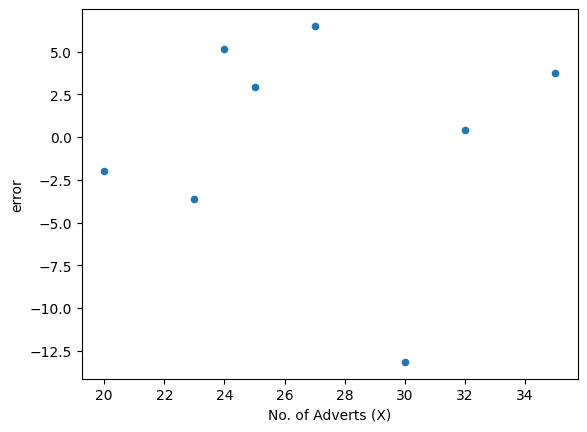

In [26]:
x=df3['No. of Adverts (X)'].to_numpy().reshape((-1, 1))
y=df3['No. of bookings (Y)'].to_numpy().reshape((-1, 1))

model = LinearRegression().fit(x,y)

r_sq = model.score(x, y)
y_pred = model.predict(x)
df3['error']=y-y_pred

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficent:', model.coef_)
print(df3['error'])
df3.plot.scatter(x='No. of Adverts (X)', y = 'error')

In [27]:
df4=df3
df4=df4.rename(columns={"No. of bookings (Y)":"Y","No. of Adverts (X)":"X"})
formula_str="Y~X"
print(df4)
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())

   Month     X      Y      error
0    1.0  20.0   61.0  -1.988636
1    2.0  24.0   77.0   5.147727
2    3.0  30.0   72.0 -13.147727
3    4.0  23.0   66.0  -3.636364
4    5.0  27.0   85.0   6.500000
5    6.0  25.0   77.0   2.931818
6    7.0  32.0   90.0   0.420455
7    8.0  35.0  100.0   3.772727


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     18.40
Date:                Sun, 28 Apr 2024   Prob (F-statistic):            0.00515
Time:                        18:05:05   Log-Likelihood:                -25.598
No. Observations:                   8   AIC:                             55.20
Df Residuals:                       6   BIC:                             55.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6705     14.156      1.319      0.2

Index(['education', 'income', 'women', 'prestige', 'census', 'type'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           6.26e-34
Time:                        18:52:26   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

<Axes: xlabel='education', ylabel='income'>

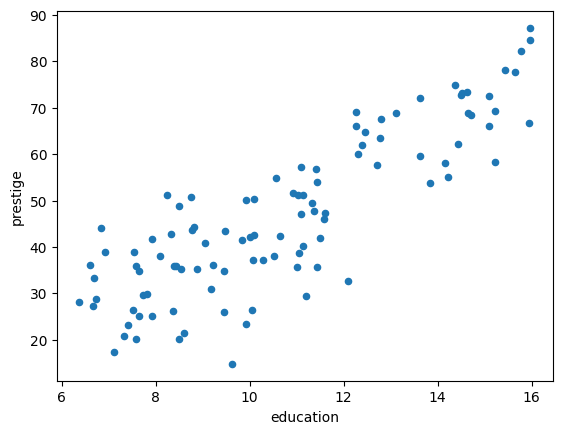

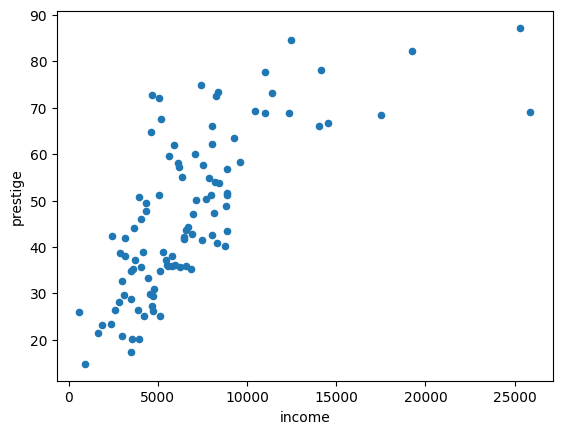

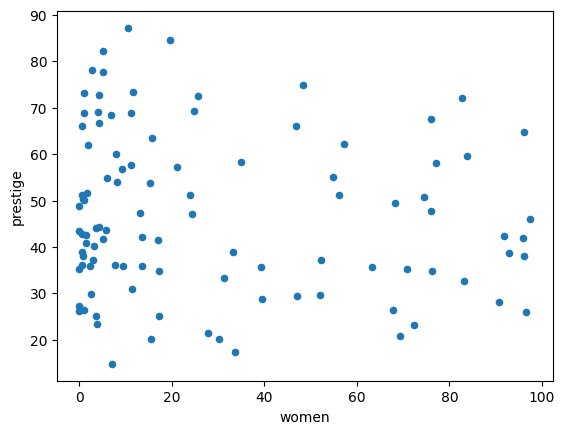

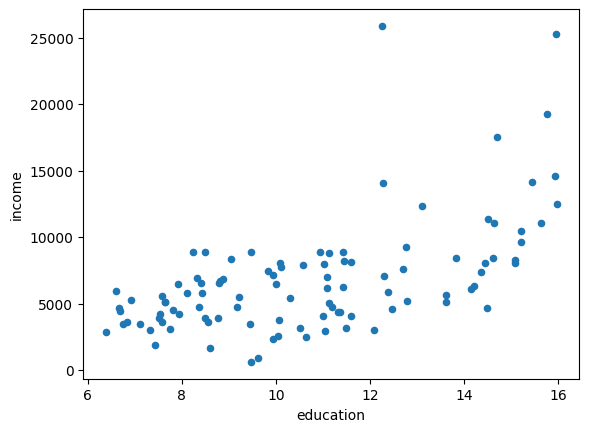

In [59]:
import statsmodels.api as smd
duncan_prestige= smd.datasets.get_rdataset("Prestige", "carData")

print(duncan_prestige.data.columns)

X = duncan_prestige.data[['education', 'income', 'women']]
y = duncan_prestige.data['prestige']
X = smd.add_constant(X)
result= smd.OLS(y, X).fit()
print(result.summary())

duncan_prestige.data.plot.scatter(x='education', y= 'prestige')

duncan_prestige.data.plot.scatter(x='income', y= 'prestige')

duncan_prestige.data.plot.scatter(x='women', y= 'prestige')

duncan_prestige.data.plot.scatter(x='education', y= 'income')


                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           4.12e-35
Time:                        18:54:45   Log-Likelihood:                -352.86
No. Observations:                 102   AIC:                             711.7
Df Residuals:                      99   BIC:                             719.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8478      3.219     -2.127      0.0

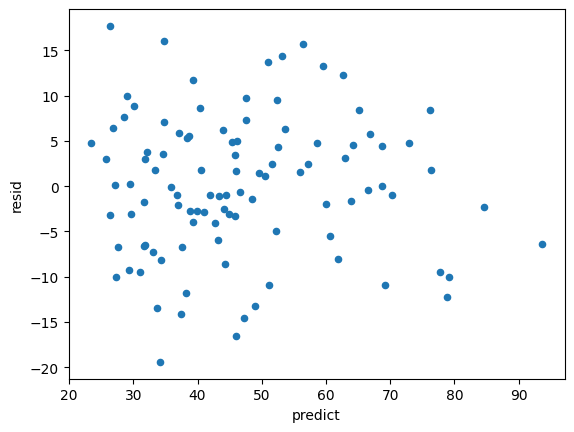

In [62]:
duncan_prestige.data[['education', 'income', 'women', 'prestige']].corr()

formula_str="prestige~education+income"
result=sm.ols(formula=formula_str,data=duncan_prestige.data).fit()
print(result.summary())
duncan_prestige.data['resid']=result.resid
duncan_prestige.data['predict']=result.predict()
duncan_prestige.data.plot.scatter( x='predict',y='resid')
print(result)